In [1]:
# Here top 45 images which I kept in result again.csv I will be viewing them with bounding boxes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

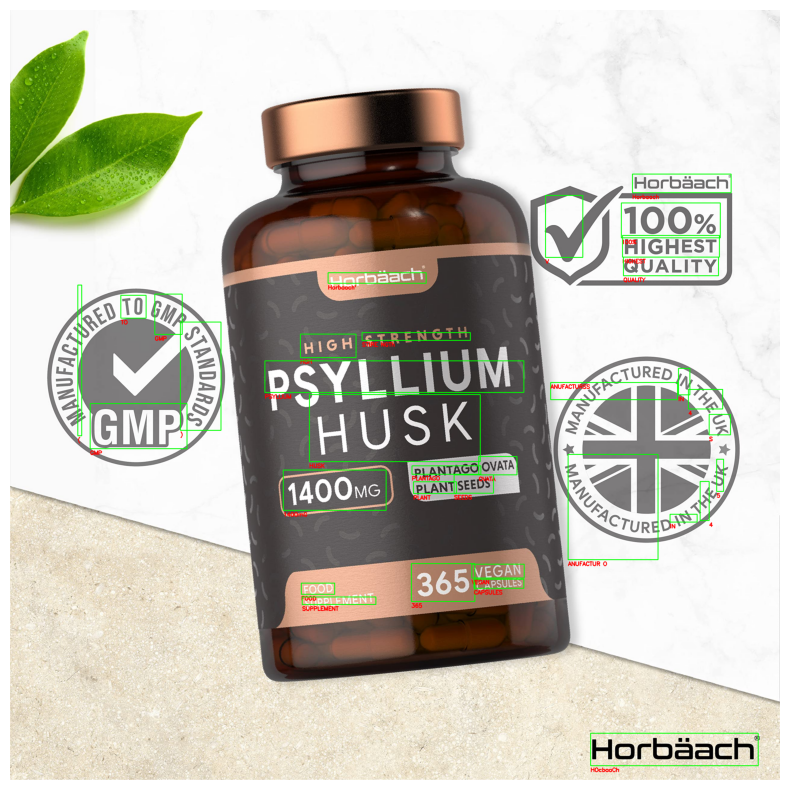

In [6]:
import cv2
import pandas as pd
import ast
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, csv_path):
    # Read the CSV file
    df = pd.read_csv(csv_path)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    
    # Convert the image from BGR (OpenCV default) to RGB (for matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Filter the dataframe for the specific image
    filename = image_path.split("/")[-1]
    image_data = df[df['filename'] == filename]

    for index, row in image_data.iterrows():
        # Convert string representation of the bounding box to an actual list
        bbox = ast.literal_eval(row['bbox'])  
        
        # Convert the bounding box coordinates to integer tuples
        pt1 = (int(bbox[0][0]), int(bbox[0][1]))  # top-left corner
        pt2 = (int(bbox[2][0]), int(bbox[2][1]))  # bottom-right corner
        
        # Draw the bounding box
        cv2.rectangle(image_rgb, pt1, pt2, (0, 255, 0), 2)  # Green color with thickness 2
        
        # Get the bottom-left corner for text placement
        text_position = (pt1[0], pt2[1] + 20)  # Placing the text slightly below the box
        
        # Put the text below the bounding box
        text = row['text']
        cv2.putText(image_rgb, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)  # Blue color text

    # Use matplotlib to display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage:
image_path = r'images/91Cma3RzseL.jpg'
csv_path = r'resultagain.csv'
draw_bounding_boxes(image_path, csv_path)
